# **VEHICLE REPAIR REPORT**
by Courage Ekwonye

![heavy-truck-hero-image@2x](heavy-truck-hero-image@2x.jpg)


## **INTRODUCTION**


This data project is aimed at identifying themes to help manage the fleet of trucks, with a specific focus on repairs. In this project, I will analyze a comprehensive dataset of truck repair records to extract valuable insights and trends that can aid in effectively managing and maintaining the fleet.


  
    
The primary objective of this data project is to uncover recurring themes and patterns related to truck repairs within the context of a national truck rental compny. By analyzing the repair data, we aim to identify common repair types, underlying reasons for repairs, and any significant trends or correlations that can provide actionable insights to optimize fleet management practices.


# PREPARATION AND PROCESSING

Data Collection Method:

The dataset utilized in this analysis was obtained via a methodical data collection approach intended to capture pertinent details regarding automobile upkeep and fixes. The implemented method of collection is as follows:


The vehicle maintenance records of a truck rental company served as the data source. The company regularly maintains these records as a component of their fleet management procedures.

The truck rental company employs a digital maintenance tracking system to document and oversee all maintenance operations for their fleet. The implemented system facilitates the effective acquisition and retention of maintenance and repair information, guaranteeing precision and uniformity.

Maintenance documentation is created by maintenance personnel whenever a vehicle undergoes maintenance or repair. The documentation includes details of the maintenance event. The dataset comprises of vehicle ID, state, repair type, reason for repair, year, make, and body type.

The process of data entry and verification involves the input of maintenance-related information into the maintenance tracking system, with a focus on ensuring the completeness and accuracy of all pertinent fields. Validation checks can be incorporated into the system to reduce data entry errors.

The maintenance tracking system undergoes periodic updates to incorporate the most recent maintenance and repair data as vehicles receive servicing or repairs. The implementation of this process guarantees that the dataset is current and accurately represents the latest maintenance operations.

The truck rental company employs data quality assurance techniques such as regular data audits and verification processes to ensure the accuracy and reliability of their data. The process aids in the detection of discrepancies, inconsistencies, or gaps in the data, which are subsequently resolved and corrected.

Appropriate security measures are implemented to safeguard the privacy and confidentiality of the data. The maintenance tracking system and its associated dataset are subject to access restrictions that limit usage to authorized personnel. Additionally, data security measures are in place to prevent unauthorized access or data breaches.

The dataset is subjected to data cleaning procedures to address missing values, outliers, and inconsistencies before analysis. The reliability and suitability of the data for analysis are ensured.




Fleet Maintenance data cleaned through use of Google Sheets

Version History: https://docs.google.com/spreadsheets/d/12nLQxWerc3cKvmOQRzYvr3ETCOyxV23sxhiNJP0rTl4/edit?usp=sharing

In [4]:

import pandas as pd
vehiclerepairs = pd.read_csv('CLEAN_FleetMaintenanceRecords.csv')
vehiclerepairs

,Vehicle ID,State,Repair,Reason,YEAR,Make,Body Type
0,1.524138e+10,AL,Battery replacement,Dead battery,2016,RAM,"1500 4WD Quad Cab 140.5"" SLT"
1,1.524138e+10,AL,Dent Repair Left Fender,Collision,2016,RAM,"1500 4WD Quad Cab 140.5"" SLT"
2,6.096554e+10,AL,Battery replacement,Dead battery,2016,RAM,"1500 4WD Quad Cab 140.5"" SLT"
3,6.096554e+10,AL,Tire repair,Flat- reparable,2016,RAM,"1500 4WD Quad Cab 140.5"" SLT"
4,6.096554e+10,AL,Tire replacement,Flat- hole not reparable,2016,RAM,"1500 4WD Quad Cab 140.5"" SLT"
...,...,...,...,...,...,...,...
784,2.950000e+15,IA,Tire replacement,Flat- hole not reparable,2018,Chevrolet Silverado,"1500 2WD Double Cab 143.5"" LT w/1LT"
785,2.960000e+15,IA,Tire repair,Flat- reparable,2019,Chevrolet Silverado,1500 LD 4WD Double Cab LT w/1LT
786,3.020000e+15,ID,Tire replacement,Flat- hole not reparable,2018,Chevrolet Silverado,"1500 2WD Double Cab 143.5"" LT w/1LT"
787,3.090000e+15,IA,Fuel tank,Corrosion,2017,Chevrolet Silverado,"1500 4WD Double Cab 143.5"" LT w/1LT"


# ANALYSIS AND INSIGHTS

## **Most Common Repairs**


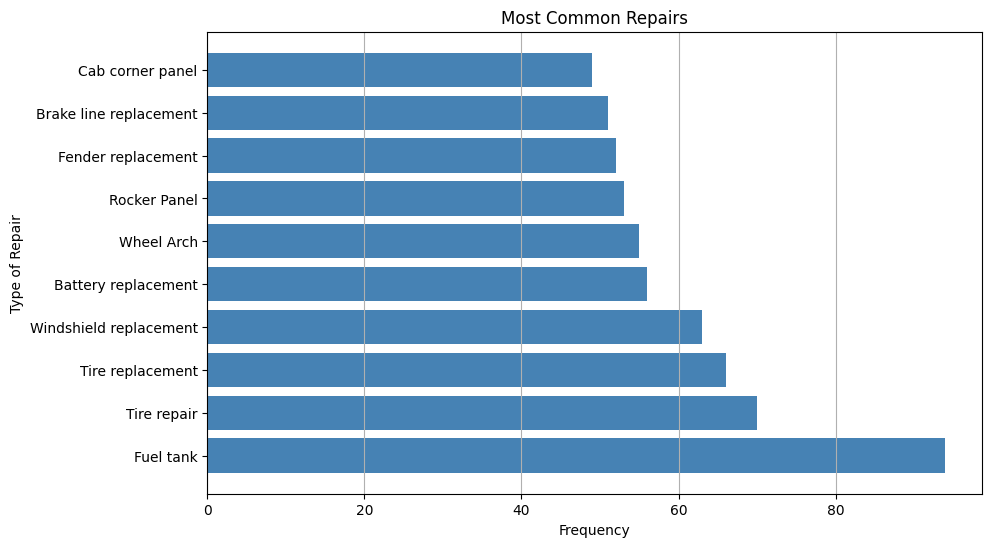

In [54]:
from matplotlib import pyplot as plt
import pandas as pd

data = {
    'Repair': [
        'Fuel tank',
        'Tire repair',
        'Tire replacement',
        'Windshield replacement',
        'Battery replacement',
        'Wheel Arch',
        'Rocker Panel',
        'Fender replacement',
        'Brake line replacement',
        'Cab corner panel'
    ],
    'Frequency': [94, 70, 66, 63, 56, 55, 53, 52, 51, 49]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.barh(df['Repair'], df['Frequency'], color='steelblue')
plt.xlabel('Frequency')
plt.ylabel('Type of Repair')
plt.title('Most Common Repairs')
plt.grid(axis='x')  # Add horizontal grid lines

plt.show()



In [1]:
SELECT DISTINCT Repair, COUNT(*) AS Frequency
FROM 'CLEAN_FleetMaintenanceRecords.csv' 
GROUP BY Repair
ORDER BY Frequency DESC;

,Repair,Frequency
0,Fuel tank,94
1,Tire repair,70
2,Tire replacement,66
3,Windshield replacement,63
4,Battery replacement,56
5,Wheel Arch,55
6,Rocker Panel,53
7,Fender replacement,52
8,Brake line replacement,51
9,Cab corner panel,49




Most common repairs: By looking at the repairs with the highest frequencies, we can identify the most common issues encountered in the fleet. In this case, "Fuel Tank" appears to be the most frequent repair, followed by "Tire Repair" and "Tire Replacement." This information can help prioritize resources, plan maintenance schedules, and ensure adequate inventory for the most frequently needed repairs.
    
Maintenance patterns: The data provides insights into the types of repairs that require more attention and resources. Repairs such as "Windshield Replacement," "Battery Replacement," and "Brake Line Replacement" appear with relatively high frequencies, indicating their significance in fleet maintenance. Identifying such patterns can inform proactive maintenance strategies to minimize downtime and potential safety risks.
    
Cost considerations: While the data does not explicitly provide cost information, it is reasonable to infer that repairs with higher frequencies may have an impact on maintenance costs. Repairs like "Fuel Tank," "Windshield Replacement," and "Tire Replacement" may require higher expenditures due to the frequency of occurrence. By integrating cost data, it is possible to analyze the financial implications and plan budget allocations accordingly.
    
Maintenance priorities: The insights obtained from the data can aid in setting maintenance priorities. For example, repairs like "Tire Repair" and "Tire Replacement" occur frequently, suggesting the need for regular tire inspections, proper tire maintenance, and timely replacements to ensure fleet safety and performance.
    
Potential areas for improvement: By identifying repairs that occur with relatively high frequencies, such as "Brake Line Replacement" or "Fender Replacement," fleet managers can investigate the root causes of these issues. Addressing underlying problems, such as faulty components or operational issues, can help reduce the occurrence of these repairs and improve overall fleet reliability.



## **Regions: Total Failures and Replacements**

In [7]:
SELECT 
    CASE 
        WHEN State IN ('AZ', 'NM', 'TX', 'OK') 
        THEN 'Southwest' 
        WHEN State IN ('AR', 'LA', 'MS', 'AL', 'GA', 'FL', 'KY', 'TN', 'SC',
         'NC', 'VA', 'WV', 'DE', 'MD', 'DC') THEN 'Southeast'
        WHEN State IN ('PA', 'NJ', 'NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME') 
        THEN 'Northeast'
        WHEN State IN ('ND', 'SD', 'KS', 'NE', 'MN', 'WI', 'IA', 
        'MO', 'MI', 'IN', 'IL', 'OH') THEN 'Midwest'
        WHEN State IN ('WA', 'ID', 'MT', 'OR', 'WY', 'CO', 'UT', 'NV', 'CA') 
        THEN 'West'
        ELSE 'Other'
    END AS Region,
    COUNT(*) AS Frequency
FROM 'CLEAN_FleetMaintenanceRecords.csv'
WHERE Reason NOT IN ('Collision', 'Rust')
GROUP BY Region
ORDER BY Frequency DESC;


,Region,Frequency
0,Southeast,130
1,Midwest,125
2,Northeast,71
3,West,52
4,Southwest,50


Text(0.5, 1.0, 'Repairs in Southeast and Midwest Regions almost double the Repairs in Other Regions')

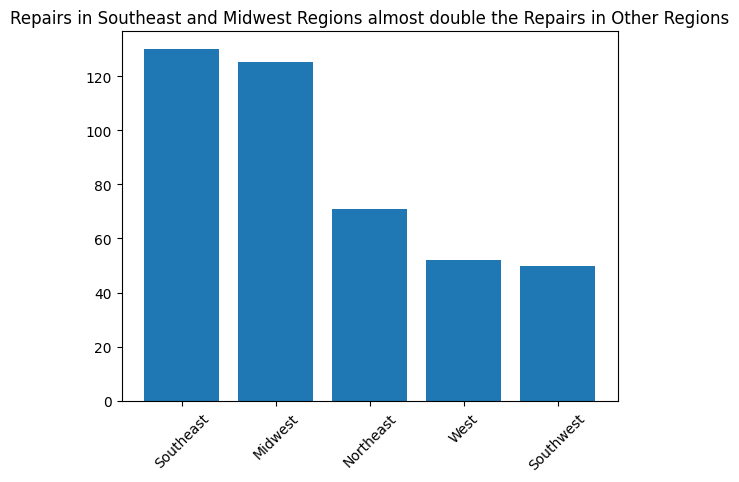

In [57]:
import pandas as pd
from matplotlib import pyplot as plt

regiondata = {
    'Region': [
        'Southeast',
        'Midwest',
        'Northeast',
        'West',
        'Southwest'
    ],
    'Frequency' : [130,125,71,52,50]
}
df2 = pd.DataFrame(regiondata)


plt.bar(df2['Region'], df2['Frequency'])
plt.xticks(rotation=45)

plt.title('Repairs in Southeast and Midwest Regions almost double the Repairs in Other Regions')




**Regional Repair Distribution:** The data provides information on repair frequencies in different regions. The Southeast and Midwest regions have higher repair frequencies with 130 and 125 occurrences, respectively. The Northeast, West, and Southwest regions have relatively lower repair frequencies, with 71, 52, and 50 occurrences, respectively.

**Maintenance and Repair Focus:** The higher repair frequencies in the Southeast and Midwest regions suggest that the rental company may have a larger customer base or higher truck utilization in these areas. This indicates a need for dedicated maintenance and repair resources to ensure the availability and reliability of trucks in these regions.

**Potential Market Expansion:** The lower repair frequencies in the Northeast, West, and Southwest regions may indicate untapped market potential for the truck rental company. These regions could be considered for potential market expansion initiatives, targeting customers who require truck rentals for various purposes such as moving, construction, or transportation.

**Geographic Resource Allocation:** Analyzing repair frequencies by region can help the company allocate resources more efficiently. It can guide decisions related to truck deployment, maintenance facilities, and spare parts inventory. By understanding the repair needs of different regions, the company can optimize its operations and provide better service to customers.



## **Most Frequently Replaced due to Corrosion or Rust**

In [9]:
SELECT  
    Repair, 
	Reason,
    COUNT(*) AS Frequency
FROM 'CLEAN_FleetMaintenanceRecords.csv'
WHERE Reason IN ('Corrosion', 'Rust') 
GROUP BY Repair, Reason
ORDER BY Frequency DESC;


,Repair,Reason,Frequency
0,Wheel Arch,Rust,55
1,Rocker Panel,Rust,53
2,Fender replacement,Rust,52
3,Brake line replacement,Corrosion,51
4,Cab corner panel,Rust,49
5,Shocks,Rust,47
6,Fuel tank,Corrosion,46
7,Struts,Rust,43


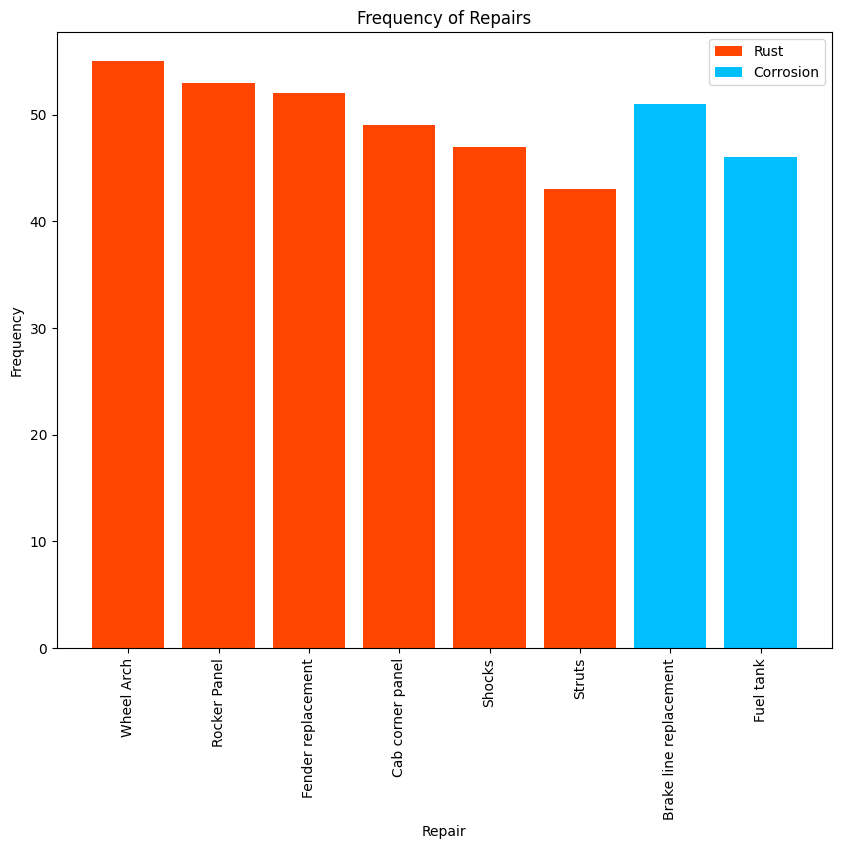

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Repair': ['Wheel Arch', 'Rocker Panel', 'Fender replacement', 'Brake line replacement', 'Cab corner panel', 'Shocks', 'Fuel tank', 'Struts'],
    'Reason': ['Rust', 'Rust', 'Rust', 'Corrosion', 'Rust', 'Rust', 'Corrosion', 'Rust'],
    'Frequency': [55, 53, 52, 51, 49, 47, 46, 43]
}

df3 = pd.DataFrame(data)

color_mapping = {'Rust': 'orangered', 'Corrosion': 'deepskyblue'}

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size (width, height)
for reason in df3['Reason'].unique():
    filtered_data = df3[df3['Reason'] == reason]
    ax.bar(filtered_data['Repair'], filtered_data['Frequency'], color=color_mapping[reason], label=reason)

plt.xlabel('Repair')
plt.ylabel('Frequency')
plt.title('Frequency of Repairs')
plt.xticks(rotation=90)
plt.legend()
plt.show()



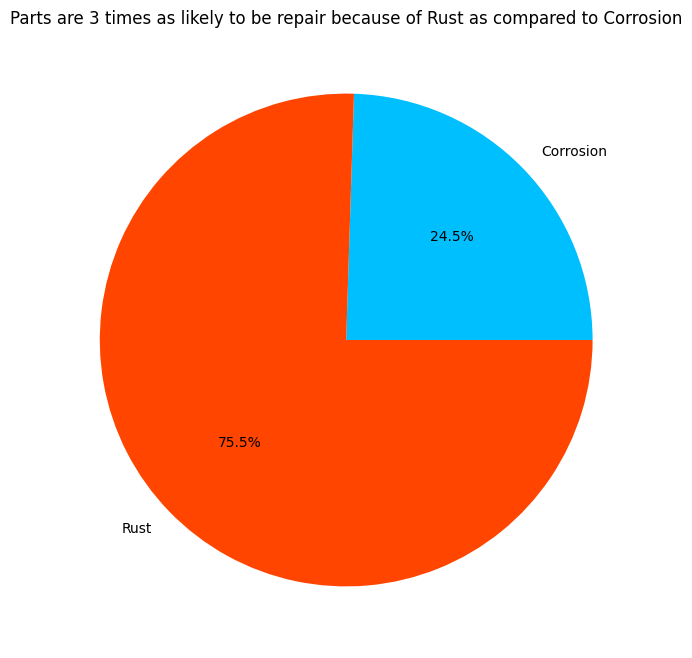

In [41]:

import matplotlib.pyplot as plt
import pandas as pd

data = {
'Reason': ['Rust', 'Rust', 'Rust', 'Corrosion', 'Rust', 'Rust', 'Corrosion', 'Rust'],
'Frequency': [55, 53, 52, 51, 49, 47, 46, 43]
}

df3 = pd.DataFrame(data)

colors = {'Rust': 'orangered', 'Corrosion': 'deepskyblue'}

grouped_data = df3.groupby('Reason')['Frequency'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Frequency'], labels=grouped_data['Reason'], colors=[colors[r] for r in grouped_data['Reason']], autopct='%1.1f%%')
plt.title('Parts are 3 times as likely to be repair because of Rust as compared to Corrosion')
plt.show()





In [17]:
SELECT 
   	Reason,
    COUNT(*) AS Frequency
FROM 'CLEAN_FleetMaintenanceRecords.csv'
WHERE Reason IN ('Corrosion', 'Rust') 
GROUP BY Reason
ORDER BY Frequency DESC;


,Reason,Frequency
0,Rust,299
1,Corrosion,97



- **Corrosion and Rust:** Several maintenance issues mentioned, such as "Wheel Arch," "Rocker Panel," "Fender replacement," "Brake line replacement," "Cab corner panel," "Shocks," "Fuel tank," and "Struts," are related to corrosion and rust. This suggests that the trucks in the rental company's fleet may be susceptible to rust and corrosion, likely due to environmental conditions or lack of proper maintenance. It is important for the company to prioritize rust prevention measures, regular inspections, and timely repairs to prevent further damage and ensure the safety and longevity of the vehicles.


- **Chassis and Undercarriage Maintenance:** The categories like "Rocker Panel," "Fender replacement," "Brake line replacement," "Cab corner panel," "Shocks," "Fuel tank," and "Struts" involve components located in the chassis and undercarriage of the truck. This highlights the significance of regular inspections and maintenance of these areas. The rental company should have a robust maintenance program in place, including periodic checks of chassis and undercarriage components, addressing rust or corrosion issues promptly, and replacing or repairing worn-out parts.


- **Safety and Performance:** Maintenance issues related to "Brake line replacement" and "Fuel tank" indicate potential safety concerns. Brake line corrosion and fuel tank corrosion can compromise the truck's braking system and fuel storage, respectively, leading to safety hazards. The rental company should prioritize regular inspections of brake lines, fuel tanks, and related components to ensure optimal safety and performance.


- **Repair and Replacement Planning:** The categories with high frequencies, such as "Wheel Arch," "Rocker Panel," "Fender replacement," and "Brake line replacement," suggest recurring maintenance or replacement needs. The rental company should develop a systematic approach for managing these repairs and replacements, including inventory management for parts, scheduling regular maintenance, and ensuring availability of necessary resources.



- **Fleet Condition Assessment:** The mentioned maintenance issues provide insights into the overall condition of the rental company's fleet. The presence of rust, corrosion, and component failures implies the need for comprehensive fleet assessments, possibly including inspections, diagnostic testing, and proactive maintenance practices. This will help identify potential issues early on, reduce downtime, and enhance the overall reliability and performance of the fleet.

The provided insights can be utilized by the truck rental company to evaluate maintenance trends, prioritize preventive measures, and devise strategies to enhance the condition, safety, and durability of their vehicles.

## **Parts Replaced due to Failure or Accident**

In [12]:
SELECT 
    Repair,
	Reason,
    COUNT(*) AS Frequency
FROM 'CLEAN_FleetMaintenanceRecords.csv'
WHERE Reason NOT IN ('Rust', 'Corrosion')
GROUP BY Repair, Reason
ORDER BY Frequency DESC;

,Repair,Reason,Frequency
0,Tire repair,Flat- reparable,70
1,Tire replacement,Flat- hole not reparable,66
2,Windshield replacement,Crack,63
3,Battery replacement,Dead battery,56
4,Fuel tank,Hole,48
5,Dent Repair Left Fender,Collision,37
6,Transmission,slips in and out of gear,28
7,Dent Repair Rear,Collision,25


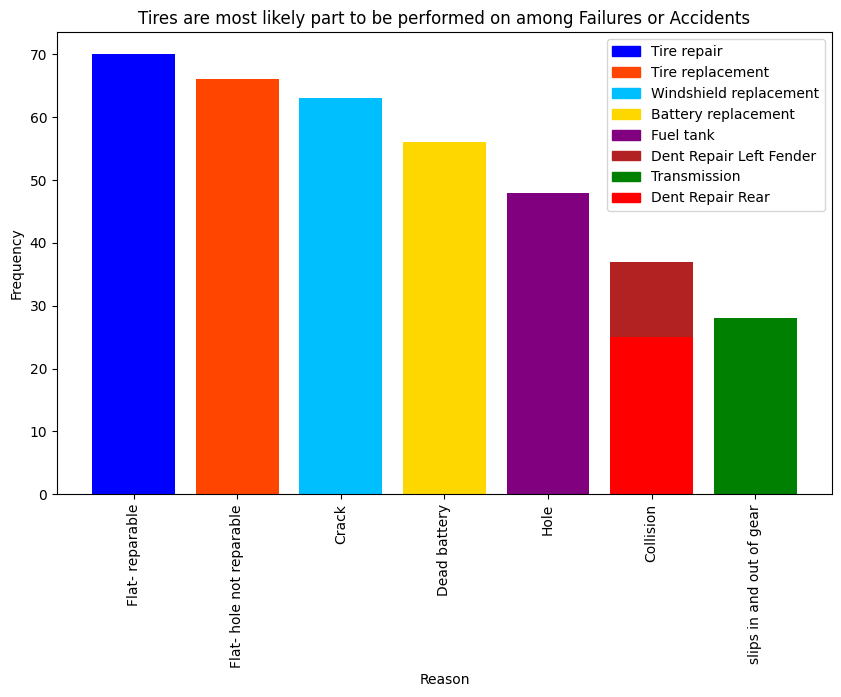

In [55]:

import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Repair': ['Tire repair', 'Tire replacement', 'Windshield replacement', 'Battery replacement', 'Fuel tank', 'Dent Repair Left Fender', 'Transmission', 'Dent Repair Rear'],
    'Reason': ['Flat- reparable', 'Flat- hole not reparable', 'Crack', 'Dead battery', 'Hole', 'Collision', 'slips in and out of gear', 'Collision'],
    'Frequency': [70, 66, 63, 56, 48, 37, 28, 25]
}

df3 = pd.DataFrame(data)

repair_colors = {
    'Tire repair': 'blue',
    'Tire replacement': 'orangered',
    'Windshield replacement': 'deepskyblue',
    'Battery replacement': 'gold',
    'Fuel tank': 'purple',
    'Dent Repair Left Fender': 'firebrick',
    'Transmission': 'green',
    'Dent Repair Rear': 'red'
}

plt.figure(figsize=(10, 6))  # Adjust the figure size (width, height)
bars = plt.bar(df3['Reason'], df3['Frequency'], color=[repair_colors[repair] for repair in df3['Repair']])
plt.xlabel('Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Tires are most likely part to be performed on among Failures or Accidents')
# Create a legend
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=repair_colors[repair]) for repair in df3['Repair']]
plt.legend(legend_labels, df3['Repair'], loc='upper right')

plt.show()








- **Tire Maintenance:** The two most common tire-related issues are "Flat- reparable" and "Flat- hole not reparable." This indicates that tire repairs and replacements are significant concerns for the truck rental company. It suggests the need for regular tire inspections, proper maintenance, and potentially keeping a stock of spare tires to minimize downtime.



- **Windshield Damage:** The chart displays a significant number of cases related to cracks. This highlights the importance of windshield integrity for safety and suggests the need for timely repairs or replacements. The truck rental company should prioritize windshield inspections and repairs to ensure clear visibility for drivers.



- **Battery Health:** The chart mentions "Dead battery" as the main reason for replacement. This indicates that battery health and maintenance are crucial. The company should implement regular battery checks, charging or replacement protocols, and ensure proper battery usage practices by drivers to avoid unexpected breakdowns.



- **Fuel Tank Issues:** This category reveals cases of holes in the fuel tank. This can lead to fuel leaks and potential safety hazards. It emphasizes the need for periodic fuel tank inspections, maintenance, and prompt repairs to prevent fuel loss and potential accidents.
 
 
 
- **Collision Repairs:** The categories "Dent Repair Left Fender," "Dent Repair Rear," and "Collision" indicate instances of truck damage due to collisions. These cases require repair and potentially impact the company's fleet availability. The company should prioritize safe driving practices, driver training, and regular vehicle inspections to minimize collisions and associated repair costs.
 
 
 
- **Transmission Problems:** The "Transmission" category a indicates a failure with the transmission slipping in and out of gear. This highlights potential mechanical failures that can affect vehicle performance and reliability. The company should focus on routine transmission maintenance, such as fluid checks and servicing, to minimize breakdowns and ensure smooth operation.



The aforementioned insights can serve as a foundation for the truck rental company to evaluate prevalent maintenance and repair concerns, pinpoint opportunities for enhancement, and devise tactics to augment fleet dependability, security, and client contentment. A more in-depth analysis and additional data may be necessary to fully comprehend the maintenance trends and their effects on the company.

# Summary


In this data project, an analysis was conducted on a comprehensive dataset of truck repair records to extract valuable insights and trends related to fleet management and maintenance. The objective was to identify common repair types, underlying reasons for repairs, and significant trends that can optimize fleet management practices.

The analysis revealed the following insights and findings:

1. Most Common Repairs:
   - "Fuel Tank" was the most frequent repair, followed by "Tire Repair" and "Tire Replacement." Prioritizing resources and planning maintenance schedules can help address these common issues effectively.

2. Maintenance Patterns:
   - Repairs such as "Windshield Replacement," "Battery Replacement," and "Brake Line Replacement" appeared with relatively high frequencies, indicating the need for attention and resources in these areas. Proactive maintenance strategies can minimize downtime and safety risks.

3. Cost Considerations:
   - Repairs with higher frequencies may have an impact on maintenance costs. Integrating cost data would allow for a more detailed analysis of financial implications and budget planning.

4. Maintenance Priorities:
   - "Tire Repair" and "Tire Replacement" occurred frequently, suggesting the need for regular inspections, proper maintenance, and timely replacements to ensure fleet safety and performance.

5. Potential Areas for Improvement:
   - By investigating the root causes of repairs occurring with high frequencies, such as "Brake Line Replacement" or "Fender Replacement," fleet managers can address underlying problems and improve overall fleet reliability.

6. Repairs by Region:
   - The Southeast and Midwest regions had higher repair frequencies, indicating the need for dedicated maintenance and repair resources in these areas. The Northeast, West, and Southwest regions had relatively lower repair frequencies, suggesting untapped market potential for expansion.

7. Geographic Resource Allocation:
   - Analyzing repair frequencies by region can help allocate resources more efficiently, guiding decisions on truck deployment, maintenance facilities, and spare parts inventory.

8. Parts Replaced due to Corrosion or Rust:
   - Several maintenance issues were related to corrosion and rust, indicating the importance of prioritizing rust prevention measures, regular inspections, and timely repairs to ensure vehicle safety and longevity.

9. Parts Replaced due to Failure or Accident:
   - Common issues included tire repairs/replacements, windshield damage, battery health, fuel tank issues, collision repairs, and transmission problems. Prioritizing inspections, repairs, and maintenance in these areas can minimize downtime and ensure fleet reliability.

These insights can assist the truck rental company in evaluating maintenance trends, prioritizing preventive measures, and devising strategies to enhance the condition, safety, and durability of their vehicles. Further analysis and additional data may be necessary for a comprehensive understanding of maintenance trends and their effects on the company.

# **Recommendations**

Based on the analysis and insights gained from the data project on truck repairs and fleet management, the following recommendations can be made:

**1. Prioritize Resources:**
   - Allocate resources based on the frequency of repairs, giving special attention to common issues like Fuel Tank repairs and Tire Repair/Replacement. Ensure an adequate inventory of parts for these repairs to minimize downtime.

**2. Proactive Maintenance:**
   - Develop a proactive maintenance strategy, focusing on repairs with high frequencies like Windshield Replacement, Battery Replacement, and Brake Line Replacement. Conduct regular inspections and preventive maintenance to minimize the occurrence of these issues.

**3. Incorporate Cost Analysis:**
   - Integrate cost data to analyze the financial implications of repairs. This will help in budget planning and resource allocation, ensuring sufficient funds for repairs with higher frequencies and potentially higher costs.

**4. Tire Maintenance:**
   - Implement regular tire inspections, proper tire maintenance, and timely replacements to address frequent Tire Repair/Replacement issues. This will ensure fleet safety and performance while reducing the risk of unexpected breakdowns.

**5. Address Corrosion and Rust:**
   - Prioritize rust prevention measures, regular inspections, and timely repairs for components prone to corrosion and rust, such as Wheel Archs, Rocker Panels, and Fender Replacements. This will help maintain the longevity and safety of the fleet.

**6. Enhance Safety Measures:**
   - Give special attention to safety-related repairs like "Brake Line Replacement" and "Fuel Tank" issues. Implement regular inspections and maintenance protocols for brake lines and fuel tanks to ensure optimal safety and minimize potential hazards.

**7. Market Expansion Opportunities:**
   - Explore untapped market potential in regions with lower repair frequencies, such as the Northeast, West, and Southwest. Consider market expansion initiatives targeting customers who require truck rentals for various purposes like moving, construction, or transportation.

**8. Improve Fleet Condition Assessment:**
   - Conduct comprehensive fleet assessments, including inspections and diagnostic testing, to identify potential issues early on. Implement proactive maintenance practices to reduce downtime, enhance reliability, and improve overall fleet performance.

**9. Driver Training and Safe Driving Practices:**
   - Prioritize driver training programs to minimize collision-related repairs like Dent Repair and Collision. Emphasize safe driving practices and regular vehicle inspections to reduce accidents and associated repair costs.

**10. Regular Transmission Maintenance:**
    - Implement routine transmission maintenance, including fluid checks and servicing, to prevent potential mechanical failures and ensure smooth operation of the vehicles.

By implementing these recommendations, the truck rental company can enhance fleet management practices, optimize maintenance operations, reduce repair costs, and improve customer satisfaction by ensuring the availability, reliability, and safety of their vehicles.